In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [53]:
from utils.func_utils import accept, jacobian, autocovariance, get_log_likelihood, get_data, binarize, normal_kl
from utils.distributions import Gaussian, GMM, GaussianFunnel, gen_ring, RoughWellhWell
from utils.layers import Linear, Parallel, Sequential, Zip, ScaleTanh
from utils.dynamics import Dynamics
from utils.sampler import propose
from utils.losses import get_loss, loss_mixed

In [65]:
sess = tf.Session()

gaussian = RoughWell(dim=2, eps=0.01)
x_dim = 2

def get_hmc_samples(eps, steps=200, samples=None):
    hmc_dynamics = Dynamics(x_dim, gaussian.get_energy_function(), T=5, eps=eps, hmc=True)
    hmc_x = tf.placeholder(tf.float32, shape=(None, x_dim))
    Lx, _, px, hmc_MH = propose(hmc_x, hmc_dynamics, do_mh_step=True)
    
    if samples is None:
        samples = gaussian.get_samples(n=200)
    final_samples = []
    
    for t in range(steps):
        final_samples.append(np.copy(samples))
        Lx_, px_, samples = sess.run([Lx, px, hmc_MH[0]], {hmc_x: samples})
        if np.isnan(Lx_.flatten()).sum() > 0:
            print np.round(px_, decimals=2)
    return np.array(final_samples)

In [76]:
samples = np.random.randn(200, 2)
S = get_hmc_samples(0.05, samples=samples)
T = get_hmc_samples(0.15, samples=samples)
U = get_hmc_samples(0.25, samples=samples)
V = get_hmc_samples(0.35, samples=samples)

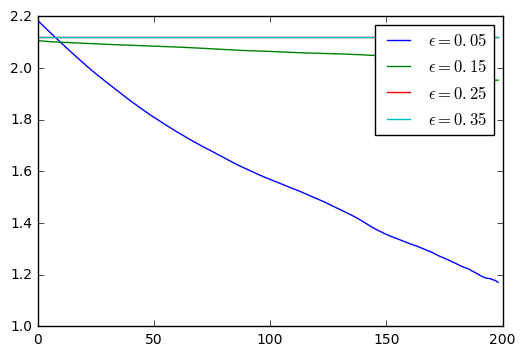

In [77]:
plt.plot(np.abs([autocovariance(S, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.05)
plt.plot(np.abs([autocovariance(T, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.15)
plt.plot(np.abs([autocovariance(U, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.25)
plt.plot(np.abs([autocovariance(V, tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % 0.35)

plt.legend()

In [70]:
for eps in np.arange(0.05, 0.5, 0.1):
    print eps
    plt.plot(np.abs([autocovariance(get_hmc_samples(eps), tau=t) for t in range(199)]), label='$\epsilon=%.2f$' % eps)
plt.legend()

0.05


KeyboardInterrupt: 

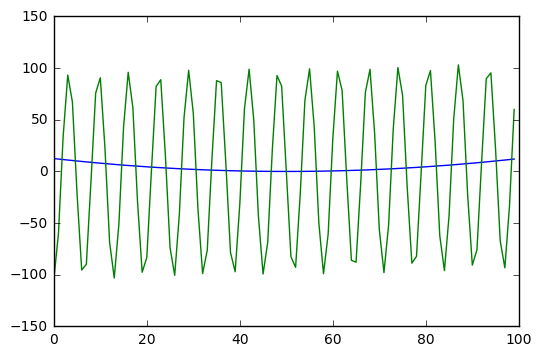

In [52]:
plt.plot(e_)
plt.plot(g_)